In [1]:
import pandas as pd
import numpy as np
# from sklearn.impute import KNNImputer
# from sklearn.model_selection import train_test_split
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
 
df = pd.read_csv("./housing/housing.csv")
 
# df_quantitative = df.drop('ocean_proximity', axis=1)
# imputer = KNNImputer(n_neighbors=2)
# df_quantitative = imputer.fit_transform(df_quantitative)
# df['total_bedrooms'] = df_quantitative[:,4]
# df_ocean_proximity = pd.get_dummies(df['ocean_proximity'], dtype=float)
# df = pd.merge(df, df_ocean_proximity, left_index=True, right_index=True)
# df = df.drop('ocean_proximity', axis=1)
 
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(df)
# scaled_df = pd.DataFrame(scaled_features, index=df.index, columns=df.columns)
# y=scaled_df['median_house_value']
# X=scaled_df.drop('median_house_value', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)
# reg = RandomForestRegressor(random_state=0)
# reg.fit(X_train, y_train)
# predictions = reg.predict(X_test)
# reg.score(X_test, y_test)

In [2]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Demonstration de valeurs erronées de median_house_value a 500 001

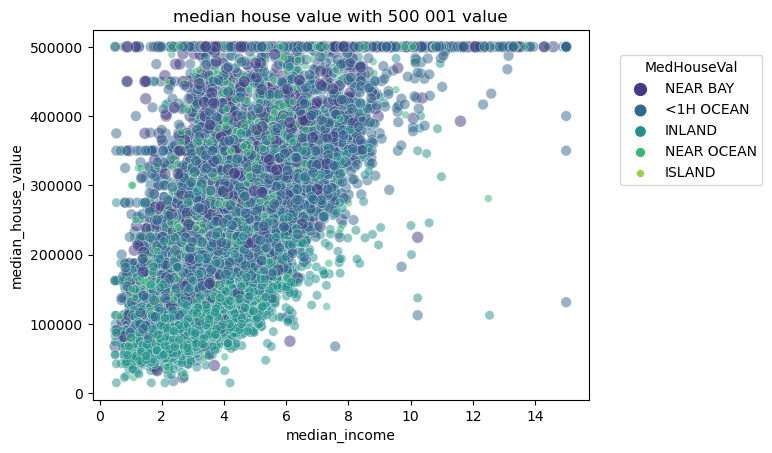

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

df_delete_max_y = df
#df_delete_max_y = df[df['median_house_value'] != 500001]
# df_delete_max_y = df[(df['median_house_value'] != 500001) & (df['median_house_value'] != 500000)]

sns.scatterplot(
    data=df_delete_max_y,
    x=df_delete_max_y["median_income"],
    y=df_delete_max_y["median_house_value"],
    size=df_delete_max_y["ocean_proximity"],
    hue=df_delete_max_y["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("median house value with 500 001 value")

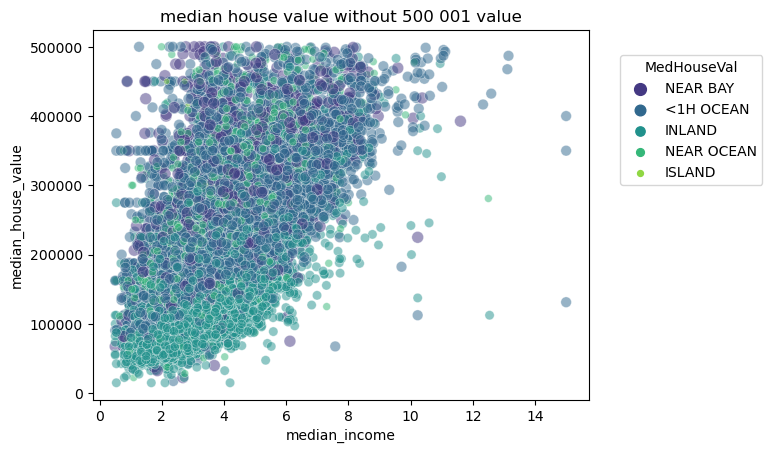

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# df_delete_max_y = df
df_delete_max_y = df[df['median_house_value'] != 500001]
# df_delete_max_y = df[(df['median_house_value'] != 500001) & (df['median_house_value'] != 500000)]

sns.scatterplot(
    data=df_delete_max_y,
    x=df_delete_max_y["median_income"],
    y=df_delete_max_y["median_house_value"],
    size=df_delete_max_y["ocean_proximity"],
    hue=df_delete_max_y["ocean_proximity"],
    palette="viridis",
    alpha=0.5,
)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95), loc="upper left")
_ = plt.title("median house value without 500 001 value")

In [5]:
# retrait des valeurs erronées de median_house_value a 500 001

In [6]:
df = df[df['median_house_value'] != 500001]

# Traitement du dataframe

In [7]:
# # éclates la collection de la colonne "ocean_proximity" en nouvelles colonnes de 0 et 1

In [8]:
df_ocean_proximity = pd.get_dummies(df['ocean_proximity'], dtype=float)
df = pd.merge(df, df_ocean_proximity, left_index=True, right_index=True)
df = df.drop('ocean_proximity', axis=1)
print(df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0        880.0           129.0   
1        -122.22     37.86                21.0       7099.0          1106.0   
2        -122.24     37.85                52.0       1467.0           190.0   
3        -122.25     37.85                52.0       1274.0           235.0   
4        -122.25     37.85                52.0       1627.0           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0       1665.0           374.0   
20636    -121.21     39.49                18.0        697.0           150.0   
20637    -121.22     39.43                17.0       2254.0           485.0   
20638    -121.32     39.43                18.0       1860.0           409.0   
20639    -121.24     39.37                16.0       2785.0           616.0   

       population  households  median_income  media

In [9]:
# utilise les 2 plus proches voisin pour imaginer les valeurs manquantes sur la colonne "total_bedroom"

In [10]:
from sklearn.impute import KNNImputer

df_imputer = df
imputer = KNNImputer(n_neighbors=2)
df_imputer = imputer.fit_transform(df_imputer)
print(df_imputer)
# df_imputer contient les valeurs du df entier avec les valeurs manquantes ajoutés,
# il faut le transformé en df avec les bon noms de cols
df_imputer = pd.DataFrame(df_imputer, columns=df.columns)
# puis on remplace la col d'origine par la col nouvellement créer
df["total_bedrooms"] = df_imputer["total_bedrooms"]
df.info()

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]
<class 'pandas.core.frame.DataFrame'>
Index: 19675 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           19675 non-null  float64
 1   latitude            19675 non-null  float64
 2   housing_median_age  19675 non-null  float64
 3   total_rooms         19675 non-null  float64
 4   total_bedrooms      18750 non-null  float64
 5   population          19675 non-null  float64
 6   households          19675 non-null  float64
 7   median_income       19675 non-null  float64
 8   median_house_value  19675 non-null  float64
 9   <1H OCEAN       

In [11]:
# met a l'échelle les valeurs du dataframe environ entre -1 et 1

In [12]:
from sklearn.preprocessing import StandardScaler

df_without_ocean_proximity = df.drop(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'], axis=1)
df_with_ocean_proximity = df[['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_without_ocean_proximity)
scaled_df = pd.DataFrame(scaled_features, index=df_without_ocean_proximity.index, columns=df_without_ocean_proximity.columns)
scaled_df = pd.merge(scaled_df, df_with_ocean_proximity, left_index=True, right_index=True)
print(scaled_df)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0      -1.329378  1.036503            1.008388    -0.797584       -0.970477   
1      -1.324393  1.027200           -0.590487     2.053478        1.337119   
2      -1.334362  1.022548            1.887770    -0.528477       -0.826400   
3      -1.339347  1.022548            1.887770    -0.616957       -0.720113   
4      -1.339347  1.022548            1.887770    -0.455126       -0.613827   
...          ...       ...                 ...          ...             ...   
20635  -0.761099  1.780777           -0.270712    -0.437705             NaN   
20636  -0.820918  1.785429           -0.830318    -0.881479             NaN   
20637  -0.825902  1.757518           -0.910262    -0.167682             NaN   
20638  -0.875751  1.757518           -0.830318    -0.348309             NaN   
20639  -0.835872  1.729608           -0.990205     0.075752             NaN   

       population  households  median_income  media

In [13]:
# prepare la données en 70% train et 30% test avec la colonne "median_house_value" en target

In [14]:
# from sklearn.model_selection import train_test_split

# y=scaled_df['median_house_value']
# X=scaled_df.drop('median_house_value', axis=1)
# X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [15]:
# utilise le modele RandomForestRegressor en l'entrainant sur la data train, puis en verifiant le score sur la data test
#RandomForestRegressor crée un ensemble de nombreux arbres de décision (d'où le terme "forêt") 
#et les combine pour obtenir des prédictions plus précises. 
#Chaque arbre de décision est un modèle simple qui prend des décisions en fonction des caractéristiques des donnée

In [16]:
# from sklearn.ensemble import RandomForestRegressor

# reg = RandomForestRegressor(random_state=0)
# reg.fit(X_train, y_train)

# predictions = reg.predict(X_test)
# reg.score(X_test, y_test)

In [17]:
# 0.8239 avant retrait des 500 001
# 0.77831 après le retrait des 500 001

# echantillonnage stratifié sur age median

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

X=scaled_df.drop('median_house_value', axis=1)
y=scaled_df['median_house_value']

X["age_category"] = pd.cut(X["housing_median_age"],
                               bins=5,
                               labels=[1, 2, 3, 4, 5]) 
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)
strat_splits = []
for train_index, test_index in splitter.split(X, X["age_category"]):
    strat_train_set_n = X.iloc[train_index]
    strat_test_set_n = X.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])
 
strat_train_set, strat_test_set = strat_splits[0]
 
strat_train_set, strat_test_set, y_train, y_test = train_test_split(
    X,y, test_size=0.2, stratify=X["age_category"], random_state=42)
 
# comparons le résultat de l'echantillonage stratifié, random et le jeu réel
def bedrooms_cat_proportions(data):
    return data["age_category"].value_counts() / len(data)
train_set, test_set = train_test_split(X, test_size=0.2, random_state=42)
compare_props = pd.DataFrame({
    "Overall %": bedrooms_cat_proportions(X),
    "Stratified %": bedrooms_cat_proportions(strat_test_set),
    "Random %": bedrooms_cat_proportions(test_set),
}).sort_index()
compare_props.index.name = "Age Category"
compare_props["Strat. Error %"] = (compare_props["Stratified %"] /
                                   compare_props["Overall %"] - 1)
compare_props["Rand. Error %"] = (compare_props["Random %"] /
                                  compare_props["Overall %"] - 1)
compare_props

,Overall %,Stratified %,Random %,Strat. Error %,Rand. Error %
Age Category,,,,,
1,0.089911,0.089962,0.095299,0.000565,0.059921
2,0.243914,0.243964,0.240152,0.000208,-0.015420
3,0.235629,0.235578,0.231512,-0.000216,-0.017472
4,0.263177,0.263278,0.257179,0.000386,-0.022789
5,0.167370,0.167217,0.175858,-0.000911,0.050714


In [21]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(random_state=0)
reg.fit(strat_train_set, y_train)
predictions = reg.predict(strat_test_set)
reg.score(strat_test_set, y_test)

0.7949507527597497

In [243]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
 
estimator = RandomForestRegressor(random_state=0)
para_grids = {
            "n_estimators" : [50],
            "max_features" : ["auto", "log2", "sqrt"],
            "bootstrap"    : [True, False]
        }
 
# grid = GridSearchCV(estimator, para_grids)
                    #, scoring = 'mean_squared_error')
grid = GridSearchCV(estimator, para_grids, cv= 5)
grid.fit(strat_train_set, y_train)
forest = grid.best_estimator_

C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\gaeta\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\gaeta\anaconda3\Lib\site-packages\

In [244]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
 
reg_prediction=forest.predict(strat_test_set)
 
print (grid.best_score_, grid.best_params_)
 
mse = mean_squared_error(y_test, reg_prediction)
print(mse)

0.775053329379541 {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 50}
0.21157709528578106


In [ ]:
#avec cv:
#avec n_estimators" : [50],
#0.775053329379541 {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 50}
#0.21157709528578106

#sans cv:
#avec n_estimators" : [50],
#0.775053329379541 {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 50}
#0.21157709528578106
#avec n_estimators" : [100],
#0.7785101185063878 {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 100}
#0.20760828276894738
#avec n_estimators" : [200],
#0.7815933109000277 {'bootstrap': False, 'max_features': 'log2', 'n_estimators': 200}
#0.20475682990685